In [1]:
from __future__ import print_function, division
import pandas as pd
from meye import MEImage
from scipy.ndimage.filters import maximum_filter
import matplotlib.patches as patches
from scipy import signal as sg

%pylab inline
plt.rcParams['image.cmap'] = 'gray'

df = pd.read_pickle("store.pickle")




Populating the interactive namespace from numpy and matplotlib


In [5]:
def find_corners(name_img, rects):
    image = MEImage.from_file(name_img)
    sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) / 8
    sobel_kernel_y = numpy.rot90(sobel_kernel_x)
    my_image = np.arange(8) + np.arange(8)[:,np.newaxis] 
    new_image = image.im[rect[2]:rect[3],rect[0]:rect[1]]
    
    Ix = sg.convolve2d(new_image, sobel_kernel_x, "same") 
    Iy = sg.convolve2d(new_image, sobel_kernel_y, "same") 
    Ixx = Ix*Ix
    Iyy = Iy*Iy
    Ixy = Ix*Iy
    
    G = np.ones((7,7))  / 49
    Sxx = sg.convolve2d(Ixx, G, "same")
    Syy = sg.convolve2d(Iyy, G, "same")
    Sxy= sg.convolve2d(Ixy, G, "same")
    
    R = ((Sxx*Syy) - (Sxy**2)) / (Sxx+Syy+0.1)
    
    max_num = maximum_filter(R, 15)
    mask = (R == max_num)
    
#     i = np.copy(new_image)
#     i[mask] = 255
    
    return mask;
    
    

In [6]:

def index_by_mask(mask):
    y,x = mask.shape

    list_index = list(zip(np.where(mask == True)[0], np.where(mask == True)[1]))
#     for point in list_index:
#         if(point[0] < 10 or point[1] < 10 or point[0] > (x - 10) or point[1] > (y - 10)):
#             list_index.remove(point)
    return list_index
# index(mask_prev)

In [7]:
def print_points(list_points):
    img_prev, rect = MEImage.from_file(df.iloc[2].prevImage), df.iloc[2].prevRect
    img_prev = img_prev.im[rect[2]:rect[3],rect[0]:rect[1]]
    
    img_curr, rect = MEImage.from_file(df.iloc[2].prevImage), df.iloc[2].prevRect
    img_curr = img_curr.im[rect[2]:rect[3],rect[0]:rect[1]]
    
    

    i = np.copy(img_prev)
    i[mask_prev] = 255

    imshow(i, cmap='gray',origin='lower')
    
print_points(points)

NameError: name 'points' is not defined

In [8]:
def match(mask1, mask2):
    print(mask1.shape,mask2.shape)
    y_n,x_n = (mask2.shape[1] / mask1.shape[1], mask2.shape[0] / mask1.shape[0],)
    indexes1, indexes2 = index_by_mask(mask1), index_by_mask(mask2)
#     r = np.array([x_n,y_n])
#     n_indexes1 = indexes1 * r
    result = []
    for point1 in indexes1:
        for point2 in indexes2:
            p = (point1[0] * x_n, point1[1] * y_n)
            if abs(p[0] - point2[0]) < 2 and abs(p[1] - point2[1]) < 2:
                result.append([(int(point1[0]),int(point1[1])),((point2)[0],(point2)[1])])
    return (np.array(result))


In [10]:
img, rect = df.iloc[2].prevImage, df.iloc[2].prevRect
mask_prev = find_corners(img, rect)

In [11]:
img, rect = df.iloc[2].currImage, df.iloc[2].currRect
mask_curr = find_corners(img, rect)

In [12]:
x_n, y_n = (mask_prev.shape[1] / mask_curr.shape[1], mask_prev.shape[0] / mask_curr.shape[0],)
r = np.array([y_n,x_n])
indexes1 = index_by_mask(mask_prev)
indexes1 = indexes1 * r

print(indexes1)
index_by_mask(mask_curr)

[[ 2.61290323  2.6       ]
 [ 2.61290323 41.6       ]
 [ 9.58064516  2.6       ]
 [15.67741935 14.73333333]
 [16.5483871  31.2       ]
 [30.48387097 20.8       ]
 [30.48387097 31.2       ]
 [35.70967742  2.6       ]
 [43.5483871   2.6       ]
 [43.5483871  10.4       ]
 [43.5483871  41.6       ]]


[(3, 3),
 (3, 11),
 (14, 56),
 (17, 3),
 (21, 18),
 (25, 39),
 (40, 39),
 (41, 27),
 (42, 14),
 (48, 3),
 (48, 56),
 (58, 3),
 (58, 13),
 (58, 46),
 (58, 56)]

In [22]:
points = match(mask_prev, mask_curr)
points

(54, 52) (62, 60)


array([[[ 3,  3],
        [ 3,  3]],

       [[18, 17],
        [21, 18]],

       [[35, 24],
        [41, 27]],

       [[41,  3],
        [48,  3]],

       [[50,  3],
        [58,  3]],

       [[50, 12],
        [58, 13]],

       [[50, 48],
        [58, 56]]], dtype=int64)

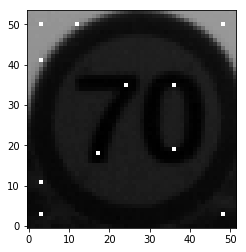

In [14]:
img_prev, rect_prev = MEImage.from_file(df.iloc[2].prevImage), df.iloc[2].prevRect
new_image_prev = img_prev.im[rect_prev[2]:rect_prev[3],rect_prev[0]:rect_prev[1]]

i = np.copy(new_image_prev)
i[mask_prev] = 255

imshow(i,cmap='gray',origin='lower')

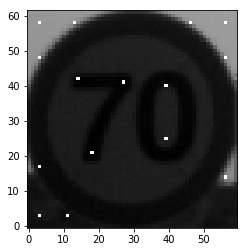

In [15]:
img_curr, rect_curr = MEImage.from_file(df.iloc[2].currImage), df.iloc[2].currRect
new_image_curr = img_curr.im[rect_curr[2]:rect_curr[3],rect_curr[0]:rect_curr[1]]

i = np.copy(new_image_curr)
i[mask_curr] = 255

imshow(i,cmap='gray',origin='lower')

In [16]:
def plot_match(list_points):
    
    for i in range(3):
        
        img_prev, rect = MEImage.from_file(df.iloc[i].prevImage), df.iloc[i].prevRect
        img_prev = img_prev.im[rect[2]:rect[3],rect[0]:rect[1]]
        img_curr, rect = MEImage.from_file(df.iloc[i].currImage), df.iloc[i].currRect
        img_curr = img_curr.im[rect[2]:rect[3],rect[0]:rect[1]]
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111)
        fig2 = plt.figure()
        ax2= fig2.add_subplot(111)

        for pair in list_points:
            ax1.imshow(img_prev, origin="lower")
            ax1.scatter(pair[0][0], pair[0][1])

            plt.imshow(img_curr, origin="lower")
            ax2.scatter(pair[1][0], pair[1][1])

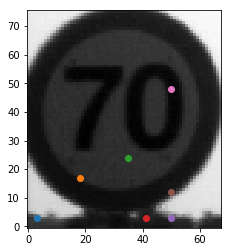

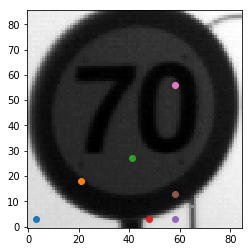

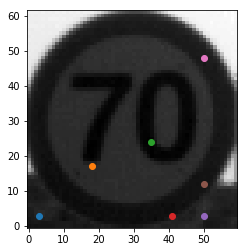

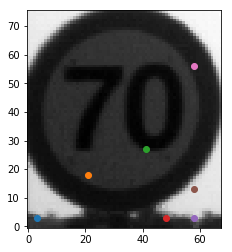

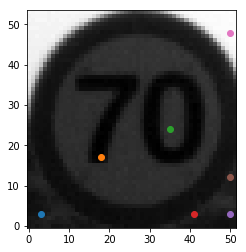

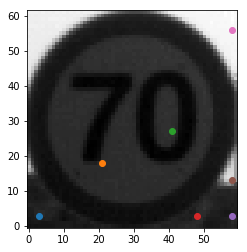

In [17]:
plot_match(points)

In [18]:
points[:,0][:,0]+=rect_prev[0]
points[:,0][:,1]+=rect_prev[2]
points[:,1][:,0]+=rect_curr[0]
points[:,1][:,1]+=rect_curr[2]
print(points)

[[[302 608]
  [260 618]]

 [[317 622]
  [278 633]]

 [[334 629]
  [298 642]]

 [[340 608]
  [305 618]]

 [[349 608]
  [315 618]]

 [[349 617]
  [315 628]]

 [[349 653]
  [315 671]]]


In [21]:
egomotion = df.iloc[2].egoMotion

focal = df.iloc[2].focal
print(focal)
R = egomotion[:3,:3]
print(R)
T = egomotion[:-1,-1]
print(T)

x_prev, y_prev = points[0][0]
x_curr, y_curr = points[0][1]

# x1,y1,x2,y2 =df.iloc[0].currRect
# print(x1,y1,x2,y2)
# x_curr = abs(x2-x1)
# y_curr = abs(y2 - y1)
# print(x_curr,y_curr)
# x1,y1,x2,y2 =df.iloc[0].prevRect
# print(x1,y1,x2,y2)
# x_prev = abs(x2 - x1)
# y_prev = abs(y2 - y1)
# print(x_prev,y_prev)


ex = focal*(T[0]/T[2])
print(ex)

origin_curr = img_curr.origin
x_curr -= origin_curr[0]
y_curr -= origin_curr[1]
origin_prev = img_prev.origin
x_prev -= origin_prev[0]
y_prev -= origin_prev[1]

prev = [x_prev, y_prev, focal]
xrot, yrot, frot = np.matmul(R, prev)
# print(T[2])
# print(xrot)
# print(xc)
Z = T[2]*((xrot-ex)/(xrot-x_curr))
Z

1612
[[ 9.99999887e-01  4.69688477e-04  7.42729400e-05]
 [-4.69526179e-04  9.99997535e-01 -2.17027886e-03]
 [-7.52921118e-05  2.17024375e-03  9.99997642e-01]]
[ 0.0569972  -0.04871089 -2.88552559]
-31.841505974636792


19.023346346254925